<a href="https://colab.research.google.com/github/ClismanJesus/hello-world/blob/main/PracticaCalificada1_CC421.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Curso de Inteligencia Artificial

### Práctica Calificada 1

Normas:

* Presenta un documento PDF con todas tus respuestas. No se aceptan otros formatos ni archivos zipeados.

* Completa todos los ítem de lo contrario la pregunta no será contabilizada. 

* Evita copiar los resultados de otras fuentes y explica tus respuestas.

#### Pregunta 1

Resuelve el siguiente caso con la ayuda de una prueba de resolución: `Si un delincuente tenía un cómplice, entonces venía en un automóvil. El criminal no tenía cómplice y no tenía la llave, o tenía la llave y un cómplice. El criminal tenía la llave. ¿Vino el criminal en automovil o no?. 


---


---



***Solucion:***

Realizamos los pasos aprendidos en clase:
 
*   **Formalización: Sea las proposiciones:**



```
P : El criminal tiene un cómplice

Q : Él viene en automóvil

R : El criminal tiene una llave
```

Obtenemos la siguiente expresión lógica formalizado de la siguiente forma:


$(P \Longrightarrow Q ) \land [(\neg P \land \neg R)\lor(R \land P)]\land R$


*   **Convertir en su forma normal conjuntiva (CNF), para ello utilizamos la equivalencia, es decir:**

$(A \Longrightarrow B) \equiv \neg A \lor B$

Entonces en nuestra expresión obtenemos:

$(P \Longrightarrow Q ) \equiv (\neg P \lor Q)$

y en la siguiente expresión usamos propiedad distributiva:

$[(\neg P \land \neg R)\lor(R \land P)] \equiv [((\neg P \land \neg R)\lor R) \land ((\neg P \land \neg R) \lor P)]$

$[(\neg P \land \neg R)\lor(R \land P)] \equiv [((\neg P \lor R) \land ( \neg R\lor R) \land ((\neg P \lor P) \land (\neg R \lor P)]$

$[(\neg P \land \neg R)\lor(R \land P)] \equiv (\neg P \lor R) \land ( \neg R \lor R) \land (\neg P \lor P) \land ( \neg R \lor P)$
 
 Observamos que tenemos las cláusulas:

$(\neg R \lor R)$ y $(\neg P \lor P)$ los cuales por el teorema $A \lor \neg A \Longleftrightarrow t$ es una tutologia, con ello nuestra expresión se reduce a: $(\neg P \lor R) \land ( \neg R \lor P)$


Entonces nuestra base de conocimiento en su forma normal conjuntiva (CNF) queda así:

$KB = (\neg P \lor Q) \land (\neg P \lor R) \land ( \neg R \lor P) \land R$


*   **Prueba: Utilizamos la prueba de resolución para saber si el criminal vino en auto o no:**

Asignamos un índice a cada cláusula de KB:

$KB \equiv (\neg P \lor Q)_{1} \land (\neg P \lor R)_{2} \land ( \neg R \lor P)_{3} \land R_{4}$

Ahora empezamos con el procedimiento de resolución:

1. Comenzamos con las cláusulas 3 y 4, completando a la cláusula 4 de la siguiente manera para dar forma a la regla de resolución:

$Res(3,4) = (\neg R \lor P , R \lor f)$

aplicando la ley conmutativa:

$Res(3,4) = \frac{P \lor \neg R , R \lor f}{P \lor f}$ donde el resultado $P \lor f \equiv P$, por lo tanto:
 
$Res(3,4): (P)_{5}$

2. Como obtuvimos la cláusula P, realizamos nuevamente la regla de resolución contre 1 y 5:

$Res(3,4) = (\neg P \lor Q , P \lor f)$

aplicando la ley conmutativa:

$Res(3,4) = \frac{\neg P \lor Q , P \lor f}{Q \lor f}$ donde el resultado $Q \lor f \equiv Q$, por lo tanto:

$Res(1,5): (Q)_{6}$

3. como aún no llegamos a la cláusula vacía no es derivable entonces aún no es contradictorio para ello agregamos $(\neg Q)_{7}$ y para intenar demostrar que el Criminal viene en automóvil; es decir, demostrar Q, entonces usamos la regla de resolucion en las cláusulas 6 y 7:

$Res(6,7) = (Q , \neg Q)$ encontrando una cláusula vacía $Res(6,7): ()_{8}$

como llegamos a la cláusula vacía hay una contradicción entonces la prueba está completa, quiere decir que: $P \land Q \land R$ 

por lo que concluimos que el **Criminal vino en automóvil.**






In [ ]:
### Tu respuesta




---



---



#### Pregunta 2

Para el ejemplo de alarma dado en clase, calcula las siguientes probabilidades condicionales:

- Calcula las probabilidades a priori $P(Al), P(J), P(M)$.

- Calcula $P(M|Bur)$ usando la regla del producto, la marginación, la regla de la cadena y la independencia condicional.

- Utiliza la fórmula de Bayes para calcular $P(Bur|M)$

- Calcula $P(Al|J, M)$ y $P(Bur|J, M)$.

- Muestra que las variables $J$ y $M$ no son independientes.

- Replica el cuaderno de la librería `pgmpy`, grafica el modelo Bayesiano del ejemplo de alarma, incluyendo las CPT y la verificación del modelo (debes mostrar `True`).


---

---

**Soución:**

Obtenemos los datos del libro para tener una mejor idea del problema:

$P(Bur) = 0.001$

$P(Ear) = 0.002$

$P(J|Al) = 0.90$

$P(J| \neg Al) = 0.05$

$P(M|Al) = 0.70$

$P(M|\neg Al) = 0.01$

$P(Al|Bur, Ear) = 0.90$

$P(Al|Bur, \neg Ear) = 0.90$

$P(Al|\neg Bur, Ear) = 0.90$

$P(Al|\neg Bur,\neg Ear) = 0.90$
*   **Calcula las probabilidades a priori $P(Al), P(J), P(M)$.**

  - Piden hallar $P(Al)$, para ello observamos que si sucede Bur o Ear entonces puede suceder Al, entonces para hallar $P(Al)$ dado Bur o Ear usamos marginalización:
  
      $P(Al) = P(Al,Bur,Ear) + P(Al,\neg Bur,Ear) + P(Al,Bur, \neg Ear) + P(Al,\neg Bur,\neg Ear)$ 
      
      ahora por probabilidad condicional, sabemos que: $P(Al|Bur,Ear) = \frac{P(Al,Bur,Ear)}{P(Bur,Ear)}$ entonces $P(Al,Bur,Ear) = P(Al|Bur,Ear) * P(Bur,Ear)$ de la misma forma para las siguientes expresiones obtenemos:

      $P(Al) = P(Al|Bur,Ear)P(Bur,Ear) + P(Al|\neg Bur,Ear)P(\neg Bur,Ear) + P(Al|Bur, \neg Ear)P(Bur,\neg Ear) + P(Al|\neg Bur,\neg Ear)P(\neg Bur,\neg Ear)$
      
      Reemplazando los datos obtenemos $P(Al)$

      $P(Al) = 0.95 * 0.001 * 0.002 + 0.29 * 0.999 * 0.002+0.94 * 0.001 * 0.998+0.001 * 0.999 * 0.998$

      $P(Al) = 0.00252$

  - Piden hallar $P(J)$, para ello observamos que si sucede $Al$ entonces puede suceder $J$, entonces para hallar $P(J)$ dado $Al$ usamos marginalización:
  
      $P(J) = P(J,Al) + P(J,\neg Al)$
      
      por probabilidad condicional $P(J|Al) = \frac{P(J,Al)}{P(Al)}$ entonces $P(J,Al)=P(J|Al) * P(Al)$ de la misma forma para la siguiente expresión obtenemos:
      
      $P(J) = P(L|Al)P(Al) + P(J|\neg Al)P(\neg Al)$ 
      
      Reemplazando los datos obtenemos $P(J)$

      $P(J) = 0.9 * 0.0025 + 0.05 * (1-0.0025) = 0.052$

  - Piden hallar  P(M) , para ello observamos que si sucede  Al  entonces puede suceder  M , entonces para hallar  P(M)  dado  Al  usamos marginalización:

      $P(M)=P(M,Al)+P(M,¬Al)$

      por probabilidad condicional  $P(M|Al) = \frac{P(M,Al)}{P(Al)}$  entonces  $P(M,Al)=P(M|Al)∗P(Al)$  de la misma forma para la siguiente expresión obtenemos:

      $P(M)=P(M|Al)P(Al)+P(M|¬Al)P(¬Al)$ 

      Reemplazando los datos obtenemos  P(J) 

      $P(M) = 0.7 * 0.0025 + 0.01 * (1-0.0025) = 0.0117$

*   **Calcula $P(M|Bur)$ usando la regla del producto, la marginación, la regla de la cadena y la independencia condicional**.

      Por probabilidad condicional sabemos que mediante la regla del producto: 

    - $P(M,Bur) = P(M|Bur) * P(Bur)$ entonces,
    
      $P(M|Bur) = \frac{P(M,Bur)}{P(Bur)}$ 
    
      Por marginalización, Mary $(M)$ sucede si sucede el Alarma $(Al)$ y de la misma forma $Al$ sucede dado $Bur$ entonces:
      
      $P(M|Bur) = \frac{P(M,Al,Bur) + P(M,\neg Al,Bur)}{P(Bur)}$ 
      
      Y por la regla de la cadena, sabemos que:

      $P(M,Al,Bur) = P(M|Al) * P(Al|Bur) * P(Bur)$ y $P(M,\neg Al,Bur) = P(M|\neg Al) * P(\neg Al|Bur) * P(Bur)$ 
      
      entonces,

      $P(M|Bur) = \frac{P(M|Al)P(Al|Bur)P(Bur) + P(M|\neg Al)P(\neg Al|Bur)P(Bur)}{P(Bur)}$ 
      
      simplificando $P(Bur)$

      $P(M|Bur) = P(M|Al)P(Al|Bur) + P(M|\neg Al)P(\neg Al|Bur)$
      
      reemplazando los datos

      $P(M|Bur) = 0.7 * 0.94002 + 0.01 * 0.05998 = 0.659$

* **Utiliza la fórmula de Bayes para calcular $P(Bur|M)$** 

    Sabemos que el teorema de Bayes es:

    - $P(Bur|M) = \frac{P(M|Bur)P(Bur)}{P(M)}$
    
    pero por el ítem anterior ya se conoce el valor de $P(M|Bur) = 0.659$, entonces 

    $P(Bur|M) = \frac{0.659 * 0.001}{0.0117} = 0.056$

* **Calcula $P(Al|J, M)$ y $P(Bur|J, M)$.**

    - Sabemos que $P(Al|J,M)$ por probabilidad condicional $P(Al|J,M) = \frac{P(Al,J,M)}{P(J,M)}$ 
    
    En el denominador podemos usar marginalización en $P(J,M)$ dado que $J y M$ dependen de $Al$ entonces $P(J,M) = P(Al,J,M) + P(\neg Al,J,M)$ reemplazando en lo anterior:

    $P(Al|J,M) = \frac{P(Al,J,M)}{P(Al,J,M) + P(\neg Al,J,M)}$ pasando a dividir el numerado al denominador obtenemos:

    $P(Al|J,M) = \frac{1}{1 + \frac{P(\neg Al,J,M)}{P(Al,J,M)}}$ y usando la regla de la cadena podemos obtener:

    $P(Al|J,M) = \frac{1}{1 + \frac{P(J|\neg Al) * P(M| \neg Al) * P(\neg Al)}{P(J|Al) * P(M|Al) * P(Al)}}$, reemplazando los datos obtenemos:

    $P(Al|J,M) = \frac{1}{1+\frac{0.05 * 0.01 * 0.9975}{0.9 * 0.7 * 0.0025}} = 0.761$

    - Para hallar $P(Bur|J,M)$ usamos el teorema de bayes:

    $P(Bur|J,M) = \frac{P(J,M|Bur)P(Bur)}{P(J,M)}$

    entonces necesitamos hallar $P(J,M|Bur)$ y $P(J,M)$

      - Empezamos con $P(J,M|Bur) = \frac{P(J,M,Bur)}{P(Bur)}$ por marginalización esto es:

        $\frac{P(J,M,Bur)}{P(Bur)} = \frac{P(J,M,Al,Bur) + P(J,M,\neg Al,Bur)}{P(Bur)}$ y por la regla de la cadena:

        $P(J,M|Bur) = \frac{P(J,M,Al,Bur) + P(J,M,\neg Al,Bur)}{P(Bur)} = \frac{P(J,M|Al)P(Al|Bur)P(Bur) + P(J,M|\neg Al)P(\neg Al|Bur)P(Bur)}{P(Bur)}$ simplificando $P(Bur)$

        $P(J,M|Bur) = P(J,M|Al)P(Al|Bur) + P(J,M|\neg Al)P(\neg Al|Bur)$ pero John (J) y Mary (M) se cumple la independencia condicional, por lo que:

        $P(J,M|Bur) = P(J|Al)P(M|Al)P(Al|Bur) + P(J|\neg Al)P(M|\neg Al)P(\neg Al|Bur)$ reemplazando los datos en lo hallado:

        $P(J,M|Bur) = 0.9 * 0.7 * 0.94 + 0.05 * 0.01 * 0.06 = 0.5922$

      - Continuamos con $P(J,M)$ por probabilidad condicional se cumple:

        $P(J,M) = P(J,M|Bur)P(Bur) + P(J,M|\neg Bur)P(\neg Bur)$

        hallaremos $P(J,M|\neg Bur)$ de la misma manera como hallamos $P(J,M|Bur)$, con marginalización y regla de la cadena:

        $P(J,M|\neg Bur) = P(J,M|Al)P(Al|\neg Bur) + P(J,M|\neg Al)P(\neg Al|\neg Bur)$ por lo que usando la independencia condicional:

        $P(J,M|\neg Bur) = P(J|Al)P(M|Al)P(Al|\neg Bur) + P(J|\neg Al)P(M|\neg Al)P(\neg Al|\neg Bur)$ antes de reemplazar los datos necesitamos hallar $P(Al|\neg Bur)$:

          - $P(Al|\neg Bur) = P(Al|\neg Bur,Ear)P(Ear) + P(Al|\neg Bur,\neg Ear)P(\neg Ear)$ reemplazando los datos:
            $P(Al|\neg Bur) = 0.29 * 0.002 + 0.001 * 0.998 = 0.00158 $

        Entonces, ahora si podemos reemplazar los datos para hallar $P(J,M|\neg Bur)$, por lo que:

        $P(J,M|\neg Bur) = 0.9 * 0.7 * 0.00158 + 0.05 * 0.01 * 0.998 = 0.00149$

      Ahora si reemplazamos en $P(J,M) = P(J,M|Bur)P(Bur) + P(J,M|\neg Bur)P(\neg Bur)$

      $P(J,M) = 0.5922 * 0.001 + 0.00149 * 0.999 = 0.00208$

    Finalmente Reemplazamos $P(J,M|Bur)$ y $P(J,M)$ en el teorema de bayes obtenido en el calculo de $P(Bur|J,M)$, entonces:

    $P(Bur|J,M) = \frac{P(J,M|Bur)P(Bur)}{P(J,M)} = \frac{0.5922 * 0.001}{0.00208} = 0.284$

* **Muestra que las variables $J$ y $M$ no son independientes.**

    Las variables $J$ y $M$ son independientes si se cumple:

    $P(J,M) = P(J)P(M)$ sin embargo

    $P(J,M) = 0.00208$  por el ítem anterior y 

    $P(J)P(M) = 0.052 * 0.0117 = 0.00061$, con ello estamos observando que:

    $P(J,M) \neq P(J)P(M)$

    Por lo tanto las variables $J$ y $M$ no son independientes
 
* **Replica el cuaderno de la librería `pgmpy`, grafica el modelo Bayesiano del ejemplo de alarma, incluyendo las CPT y la verificación del modelo (debes mostrar `True`).**

In [2]:
### Tus respuestas
!pip install pgmpy  #instalamos pgmpy para trabajar con los modelos bayesianos

     |████████████████████████████████| 1.9 MB 4.3 MB/s 


Definicion de la estructura del modelo

In [58]:
import warnings     #usamos warnig para evitar las advertencias
warnings.filterwarnings("ignore")

from pgmpy.models import BayesianModel #usamos un modelo de pgmpy llamado BayesianModel

creando un modelo PGM y agregamos todos los nodos y bordes al modelo

In [57]:
G = BayesianModel() #creamos un modelo bayesiano en la variable G

G.add_edges_from([("Burglary","Alarm"),("Earthquake","Alarm"),("Alarm","John"),("Alarm","Mary")]) #creamos los bordes para realizar la gráfica 

Dibujamos los nodos y bordes del modelo

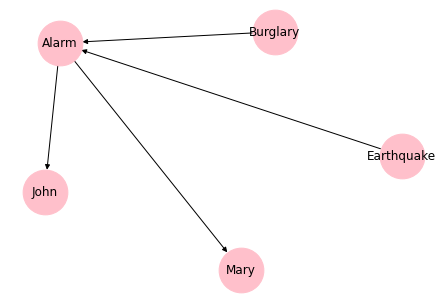

In [51]:
import networkx as nx   #importamos networkx para construir el grafo
import matplotlib.pyplot as plt

nx.draw(G, with_labels = True , node_size = 2000, node_color = "pink", linewidths=1)
plt.show() 

Definicion de las CPD

In [52]:
from pgmpy.factors.discrete.CPD import TabularCPD   #definimos las cpds

In [53]:
cpd_burglary = TabularCPD('Burglary',2,values=[[0.001],[0.999]])

cpd_earthquake = TabularCPD('Earthquake',2,values=[[0.002],[0.998]])

cpd_alarm = TabularCPD(variable = 'Alarm' , variable_card= 2, values= [[0.95, 0.94, 0.29, 0.001],[0.05, 0.06, 0.71, 0.999]], evidence= ['Burglary', 'Earthquake'], evidence_card =[2, 2])

cpd_john = TabularCPD('John',2,values=[[0.90,0.05],[0.1,0.95]],evidence=['Alarm'],evidence_card=[2])

cpd_mary = TabularCPD('Mary',2,values=[[0.70,0.01],[0.30,0.99]],evidence=['Alarm'],evidence_card=[2])

agregar las CPDs al modelo

In [54]:
G.add_cpds(cpd_burglary,cpd_earthquake,cpd_alarm,cpd_john,cpd_mary) #agregamos las CPDs al modelo

In [55]:
for cpd in G.get_cpds():  #imprimimos las cpds 
    print("\nCPD de {variable}:".format(variable=cpd.variable))
    print(cpd)


CPD de Burglary:
+-------------+-------+
| Burglary(0) | 0.001 |
+-------------+-------+
| Burglary(1) | 0.999 |
+-------------+-------+

CPD de Earthquake:
+---------------+-------+
| Earthquake(0) | 0.002 |
+---------------+-------+
| Earthquake(1) | 0.998 |
+---------------+-------+

CPD de Alarm:
+------------+---------------+---------------+---------------+---------------+
| Burglary   | Burglary(0)   | Burglary(0)   | Burglary(1)   | Burglary(1)   |
+------------+---------------+---------------+---------------+---------------+
| Earthquake | Earthquake(0) | Earthquake(1) | Earthquake(0) | Earthquake(1) |
+------------+---------------+---------------+---------------+---------------+
| Alarm(0)   | 0.95          | 0.94          | 0.29          | 0.001         |
+------------+---------------+---------------+---------------+---------------+
| Alarm(1)   | 0.05          | 0.06          | 0.71          | 0.999         |
+------------+---------------+---------------+---------------+---

verifica si los cpds son validos para el modelo

In [56]:
G.check_model()   #verificamos si el modelo está bien hecho.

True

#### Pregunta 3

Se te proporciona un modelo de Bayes, que se muestra a continuación, con la etiqueta $Y$ y las características $X_1$ y $X_2$. Las probabilidades condicionales del modelo están parametrizadas por $p_1$, $p_2$ y $q$.

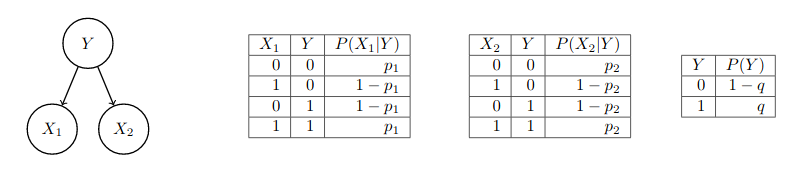

Ten en cuenta que algunos de los parámetros son compartidos (por ejemplo, $P(X_1 = 0|Y = 0)=P(X_1 = 1|Y = 1) = p_1$).


Dado un nuevo punto de dato con $X_1 = 1$ y $X_2 = 1$, ¿cuál es la probabilidad de que este punto tenga la etiqueta $Y = 1$? Expresa tu respuesta en términos de los parámetros $p_1$, $p_2$ y $q$ (es posible que no los necesite todos). Es decir debes calcular : $P(Y= 1| X_1= 1,X_2= 1)$.



---



---

**Solución:**

En el problema nos piden hallar $P(Y = 1|X_{1} = 1, X_{2} = 1)$ que es igual a $P(Y|X_{1},X_{2})$, para solucionar este ejercicio realizamos paso por paso lo aprendido en clase:

* Usamos probabilidad condicional:

  $P(Y|X_{1},X_{2}) = \frac{P(Y,X_{1},X_{2})}{P(X_{1},X_{2})}$

*  Aqui usamos la marginalización en $P(X_{1},X_{2})$ con respecto a $Y$, dado que $Y$ es el nodo padre de las variables $X_{1} y X_{2}$:

  $P(X_{1},X_{2}) = P(Y,X_{1},X_{2}) + P(\neg Y,X_{1},X_{2})$

  Entonces reemplazando en $P(Y|X_{1},X_{2}) = \frac{P(Y,X_{1},X_{2})}{P(X_{1},X_{2})} = \frac{P(Y,X_{1},X_{2})}{P(Y,X_{1},X_{2}) + P(\neg Y,X_{1},X_{2})}$

  Dividiendo entre $P(Y,X_{1},X_{2})$ tanto en el numerador y denominador, obtenemos:

  $P(Y|X_{1},X_{2}) = \frac{\frac{P(Y,X_{1},X_{2})}{P(Y,X_{1},X_{2})}}{\frac{P(Y,X_{1},X_{2}) + P(\neg Y,X_{1},X_{2})}{P(Y,X_{1},X_{2})}} = \frac{1}{\frac{P(Y,X_{1},X_{2}) + P(\neg Y,X_{1},X_{2})}{P(Y,X_{1},X_{2})}} = \frac{1}{1 + \frac{P(\neg Y,X_{1},X_{2})}{P(Y,X_{1},X_{2})}}$

*  usando la regla de la cadena la expresion $P(Y,X_{1},X{2})$ y $P(\neg Y,X_{1},X{2})$ sería de la siguiente forma:

  - $P(\neg Y,X_{1},X_{2}) = P(\neg Y)P(X_{1}| \neg Y)P(X_{2}|\neg Y)$ dado que $Y$ es padre de $X_{1}$ y $X_{2}$

  - $P(Y,X_{1},X_{2}) = P(Y)P(X_{1}|Y)P(X_{2}|Y)$ dado que $Y$ es padre de $X_{1}$ y $X_{2}$ 

  reemplazamos lo encontrado en:

  $P(Y|X_{1},X_{2}) = \frac{1}{1 + \frac{P(\neg Y,X_{1},X_{2})}{P(Y,X_{1},X_{2})}} = \frac{1}{1 + \frac{P(\neg Y)P(X_{1}| \neg Y)P(X_{2}|\neg Y)}{P(Y)P(X_{1}|Y)P(X_{2}|Y)}}$

  el cual dando valores sería:

  $P(Y=1|X_{1}=1,X_{2}=1)  = \frac{1}{1 + \frac{P(Y=0)P(X_{1}=1|Y=0)P(X_{2}=1|Y=0)}{P(Y=1)P(X_{1}=1|Y=1)P(X_{2}=1|Y=1)}}$

  con ello, observamos que los valores todas las probabilidades se encuentran en la imagen proporcionada en el problema:

  - $P(Y=0) * P(X_{1}=1|Y=0) * P(X_{2}=1|Y=0)  = (1-q) * (1 - p_{1}) * (1 - p_{2}) $

  - $P(Y=1)P(X_{1}=1|Y=1)P(X_{2}=1|Y=1) = q * p_{1} * p_{2}$

  reemplazando sería:

  $P(Y=1|X_{1}=1,X_{2}=1)  = \frac{1}{1 + \frac{(1-q) (1 - p_{1}) (1 - p_{2})}{q .  p_{1}  p_{2}}}$

  desarrollando $(1-q) (1 - p_{1}) (1 - p_{2}) = 1-p_{1}-p_{2}+p_{1}p_{2}-q+qp_{2}+qp_{1}-qp_{1}p_{2}$, reemplanzado queda:

  $P(Y=1|X_{1}=1,X_{2}=1)  = \frac{p_{1}p_{2}q}{p_{1}p_{2}q + 1-p_{1}-p_{2}+p_{1}p_{2}-q+qp_{2}+qp_{1}-qp_{1}p_{2}}$

  $P(Y=1|X_{1}=1,X_{2}=1)  = \frac{p_{1}p_{2}q}{1-p_{1}-p_{2}+p_{1}p_{2}-q+qp_{2}+qp_{1}}$

  finalmente factorizando en denominador $1-p_{1}-p_{2}$ la probabilidad pedida es:

  $P(Y=1|X_{1}=1,X_{2}=1)  = \frac{p_{1}p_{2}q}{(1-p_{1}-p_{2})(1-q)+p_{1}p_{2}}$



In [ ]:
## Tus respuestas


#### Pregunta 4

Supongamos que eres testigo de un atropello y fuga en una noche que involucró a un taxi en Lima. Todos los taxis en Lima son azules o verdes. Juras, bajo juramento, que el taxi era azul. Pruebas exhaustivas muestran que, en condiciones de poca luz, la discriminación entre azul y verde es un $75%$ fiable.

* ¿Es posible calcular el color más probable para el taxi?

* ¿Qué pasa si sabe que 9 de cada 10 taxis limeños son verdes? 



In [ ]:
### Tus respuestas